# Load Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data science
import math
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.multitest import multipletests as mt

# Plots
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# Working with dates
from datetime import date,datetime
import dateutil

# Looping  progress
from tqdm.notebook import tqdm

# Reg expressions
import re

# Reading/Writing Excel files with Pandas
import xlrd

# Pretty table printing
import tabulate

import os
import subprocess

# Misc libraries
from IPython.display import display, HTML
#from IPython.core.display import display, HTML

# Set seaborn figure size, font size, and style
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.set_style("white")

# Set Pandas options so we can see our entire dataframe
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000
pd.options.display.max_colwidth = None

# Print our versions of this packages, this allows us to make sure
# we have the working versions we need. 
print(f"Pandas version: {pd.__version__}")

Pandas version: 1.4.2
xlrd version: 2.0.1


# Prep Environment

In [2]:
# Remove grey side bars
display(HTML("<style>.container { width:90% !important; }</style>"))

os.chdir('../../../../results/')

# UKB Analytical vs Empirical Scattter 

In [3]:
# Read in latest results
dat = pd.read_csv('emp_results_01_17_2023.tsv', sep = '\t')

Text(0.35, 0.925, "Pearson's r: 0.999994")

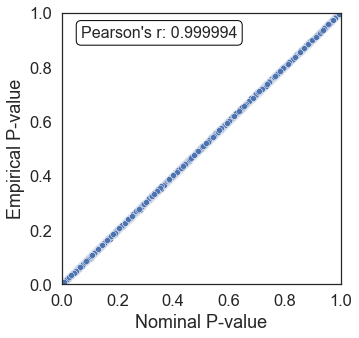

In [4]:
PLOT_W = 5
PLOT_H = 5

corr_val = dat['p_val'].corr(dat['mod_3_emp_p'], method = 'pearson')

fig, ax = plt.subplots(figsize = (PLOT_W, PLOT_H), facecolor = 'white')    
sns.scatterplot(data = dat, x = 'p_val', y = 'mod_3_emp_p', ax = ax)

ax.set_xlabel('Nominal P-value')
ax.set_ylabel('Empirical P-value')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.text(x = 0.35, y = 0.925,
        s = f"Pearson's r: {round(corr_val, 6)}", 
        ha = 'center', va = 'center', fontsize = 16,
        bbox = dict(boxstyle = "round", fc = "w", ec = 'black'))

In [5]:
out_dir = '../manuscript/figures/supp_fig_2'
fn = f"{out_dir}/supp_fig_2.pdf"
fig.savefig(fn, format = 'pdf', dpi = 600, bbox_inches="tight")